# Level Scheme

This notebook is intended to demonstrate the creation of a simple level scheme plot from ENSDF data using nudel.

In [1]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
import matplotlib.pyplot as plt

import project_path
from nudel import Nuclide

In [2]:
def level_scheme(nuc=None, nucleons=None, protons=None):
    decays = []
    if not nuc:
        nuc = Nuclide(nucleons, protons)
    for level in nuc.adopted_levels.levels:
        decays.extend(level.decays)
    
    i = 0.5
    for level in nuc.adopted_levels.levels:
        plt.axhline(level.energy.val, color='k')
        for decay in level.decays:
            plt.plot(
                [i, i],
                [decay.orig_level.energy.val, decay.dest_level.energy.val]
            )
            i += 1
    plt.xlim(0, i - 0.5)
    plt.ylim(0, nuc.adopted_levels.levels[-1].energy.val)
    plt.show()

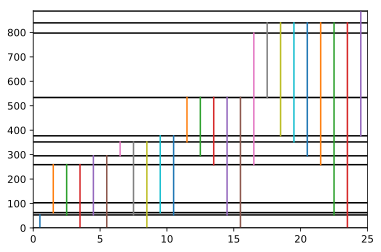

In [3]:
level_scheme(nucleons=214, protons=83)

## List of Levels

It is possible to access individual properties of nuclear states.

In [4]:
def list_levels(nuc=None, nucleons=None, protons=None):
    if not nuc:
        nuc = Nuclide(nucleons, protons)
    for l in nuc.adopted_levels.levels:
        hl = str(l.half_life)
        if hl[0] not in "<>≤≥":
            hl = f"= {hl}"
        print(f"E = {l.energy}. Jπ = {l.ang_mom}. λ {hl}.")

In [5]:
list_levels(nucleons=214, protons=83)

E = 0.0 keV. Jπ = [1-]. λ = 19.9(4) min.
E = 53.2282(16) keV. Jπ = [2-]. λ ≤ 0.10 ns.
E = 62.69(5) keV. Jπ = []. λ = nan.
E = 103(6) keV. Jπ = []. λ = nan.
E = 258.870(20) keV. Jπ = [2-]. λ = nan.
E = 295.2231(16) keV. Jπ = [1-]. λ ≤ 0.05 ns.
E = 351.9324(18) keV. Jπ = [0-, 1-]. λ ≤ 0.10 ns.
E = 377.04(4) keV. Jπ = []. λ = nan.
E = 533.676(13) keV. Jπ = [1-]. λ = nan.
E = 797.29(9) keV. Jπ = []. λ = nan.
E = 839.009(20) keV. Jπ = [1+]. λ = nan.
E = 888.04(10) keV. Jπ = []. λ = nan.
